<a href="https://colab.research.google.com/github/Muhammad-Tayyab-Bhutto/Data-Science-Exercises/blob/main/AI-Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial Intelligence Practical
## WorkSheet 01
This worksheet is intented to give you clear idea of regression and its practical implementation in python.
You are required to complete all tasks and submit this worksheet with all required datasets that you have used.

You can take help from online for description and implementation of your regression concepts. You are also provided with a folder containing enough support materials to complete following tasks.

# Task 01: What is Regression, its types and examples using plots
* It is like a statistical model in which we relate one variable to another variable by using technique we can predict the values of any specific variable that how it is behaving that means using this we can check how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed.
1. Linear Regression
* It shows relationship between dependent variable (Y) and independent variable (X) on only one input variable (X).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
# Reading CSV file
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
longitude = data['longitude']
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array(data[['longitude', 'latitude']])
y_train = np.array(data['median_house_value'])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train = [[-114.31   34.19]
 [-114.47   34.4 ]
 [-114.56   33.69]
 ...
 [-124.3    41.84]
 [-124.3    41.8 ]
 [-124.35   40.54]]
y_train = [ 66900.  80100.  85700. ... 103600.  85800.  94600.]
x_train.shape: (17000, 2)
Number of training examples is: 17000


In [ ]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = ([-114.31   34.19], 66900.0)


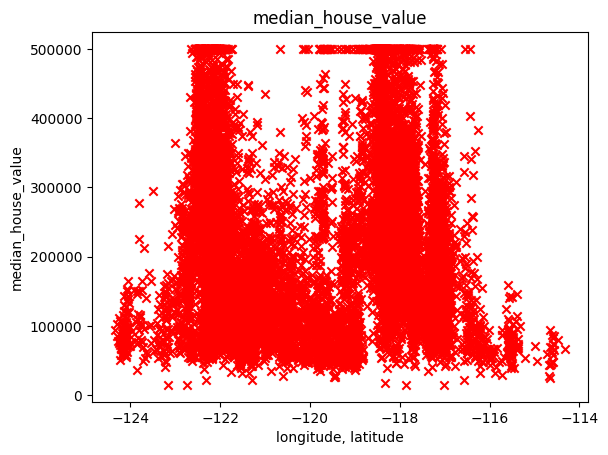

In [ ]:
# Plot the data points
plt.scatter(x_train[:, 0], y_train, marker='x', c='r')
# Set the title
plt.title("median_house_value")
# Set the y-axis label
plt.ylabel('median_house_value')
# Set the x-axis label
plt.xlabel('longitude, latitude')
plt.show()

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | longitude  | `x_train` |   
|  $\mathbf{y}$  | latitude  | `y_train`
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` |


the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [ ]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

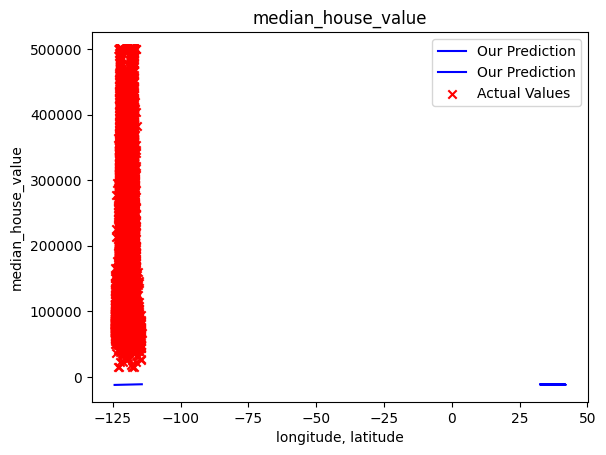

In [ ]:
lng_f_wb = compute_model_output(x_train[:, 0], w, b,)

# Plot our model prediction
plt.plot(x_train, lng_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train[:, 0], y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("median_house_value")
# Set the y-axis label
plt.ylabel('median_house_value')
# Set the x-axis label
plt.xlabel('longitude, latitude')
plt.legend()
plt.show()

2. Multiple Linear Regression
* It shows relationship between dependent variable (Y) and independent variable (X) on more than one input variables (X)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is stored in a DataFrame named 'data'
# Extracting features (latitude and longitude) and target variable (median_house_value)
X = data[['longitude', 'latitude']]
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 10439751909.257132
Coefficients: [-71966.98128416 -70282.24435565]
Intercept: -5894121.052114011


# 3. Logistic Regression.

It is a statistical technique we use when we need to predict the probability of an **event** or an **outcome** while using this technique we analyze our data and use a sigmoid function which gives us values between 0 to 1 which is the probability

# 4. Non-Linear Regression

This refers to a type of regression analysis where the relationship between the independent variables and the dependent variable is not linear.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
# dummy data
from sklearn.datasets import fetch_california_housing

In [22]:
# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Define polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)

# Transform features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.46430152592457724


#5. Polynomial Regression
It is statistical technique which is used to find relationship between a dependent variable and one or more independent variables.
y=β
0
​
 +β
1
​
 x+β
2
​
 x
2
 +…+β
n
​
 x
n
 +ε

#6. Decision Tree Regression
It is a non-parametric supervised learning method which works by recursively partitioning the feature space into smaller regions and predicting the target variable based on the average value of the target variable within each region.

#7. Random Forest Regression
Random forest regression is an ensemble learning method that combines multiple decision trees to create a more robust and accurate predictive model. It operates by building a multitude of decision trees during training and averaging their predictions to improve the overall predictive performance.

#Task 02: Implement Linear and Multiple Regression, also descibe the difference between both of them?
Already Implemented above.

#Task 03: What is KNN? Is it used for Regression or Classificiation?
KNN is a supervised machine learning algorithm used for both classification and regression tasks in which prediction for a new data point is made based on the majority class (for classification) or the average of the nearest k neighbors values (for regression) in the feature space.

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array([[14, 15], [17, 20], [15, 21], [21, 22]])
y_train = np.array([10, 20, 30, 40])

knn_regressor = KNeighborsRegressor(n_neighbors=2)

knn_regressor.fit(X_train, y_train)

X_test = np.array([[12, 23]])
prediction = knn_regressor.predict(X_test)
print("Predicted value:", prediction)


Predicted value: [25.]


# Task 04: How you would evaluated the performance of different Regression models?

Performance Metrics for Regression:

1. Measures the average absolute errors between 2 predicted and actual values.
2. Measures the average squared differences between predicted and actual values.
3. Square root of the average of squared differences between predicted and actual values.
4. Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.







Please, list and describe performance metrics for Regression. Also, Compare the formance of atleast two models of regression on same dataset. You can also, fine tune different parameters of various models.

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


if len(y_test) < 2:
    print("Test set has less than two samples. Please provide a larger test set.")
else:
    # Polynomial Regression
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y_train)
    poly_pred = poly_reg.predict(poly_features.transform(X_test))
    mae_poly = mean_absolute_error(y_test, poly_pred)
    r2_poly = r2_score(y_test, poly_pred)

    # Decision Tree Regression
    dt_regressor = DecisionTreeRegressor(random_state=42)
    dt_regressor.fit(X_train, y_train)
    dt_pred = dt_regressor.predict(X_test)
    mae_dt = mean_absolute_error(y_test, dt_pred)
    r2_dt = r2_score(y_test, dt_pred)

    # Result
    print("Polynomial Regression MAE --> ", mae_poly)
    print("Polynomial Regression R2 Score --> ", r2_poly)
    print("Decision Tree Regression MAE --> ", mae_dt)
    print("Decision Tree Regression R2 Score --> ", r2_dt)


Polynomial Regression MAE -->  2.6645352591003757e-15
Polynomial Regression R2 Score -->  1.0
Decision Tree Regression MAE -->  2.0
Decision Tree Regression R2 Score -->  0.5555555555555556


The model with lower MAE and higher R2 score indicates better performance.